### [ 산점도 그래프 ]
- 2개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함.


In [97]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
# [2] 데이터 준비
F_DATA=r'C:\Users\zizonkjs\pandas\datafolder\auto_mpg.csv'
df=pd.read_csv(F_DATA)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,,,,,,,,
18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
44.0,4,97.0,52,2130,24.6,82,2,vw pickup
32.0,4,135.0,84,2295,11.6,82,1,dodge rampage


In [99]:
# 3. 컬럼별 타입 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [100]:
# 4. 연비와 관련이 높은 컬럼, 변수확인
# 4-1 상관계수 확인하기
corrsr=df.corr(numeric_only=True)['mpg']
round(corrsr['weight'],2), corrsr


(-0.83,
 mpg             1.000000
 cylinders      -0.775396
 displacement   -0.804203
 weight         -0.831741
 acceleration    0.420289
 model year      0.579267
 origin          0.563450
 Name: mpg, dtype: float64)

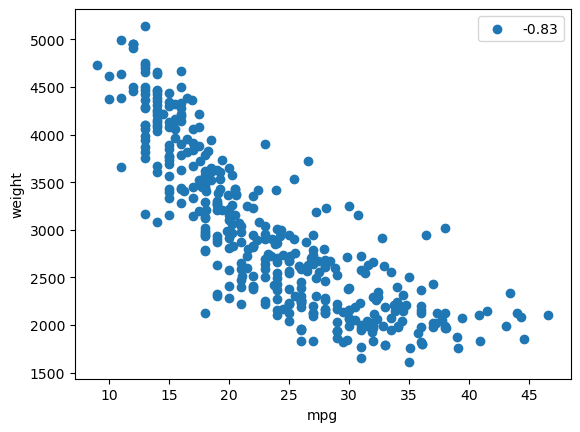

In [101]:
# 5. 시각화 시켜서 보기
plt.scatter(df.mpg, df.weight, label=round(corrsr['weight'],2))
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

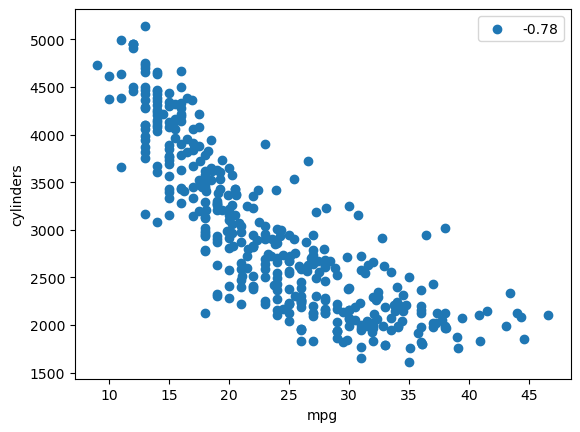

In [102]:
# 4-3 mpg 컬럼과 다른 컬럼관의 관계 시각화
round(corrsr['cylinders'],2), corrsr
plt.scatter(df.mpg, df.weight, label=round(corrsr['cylinders'],2))
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.legend()
plt.show()

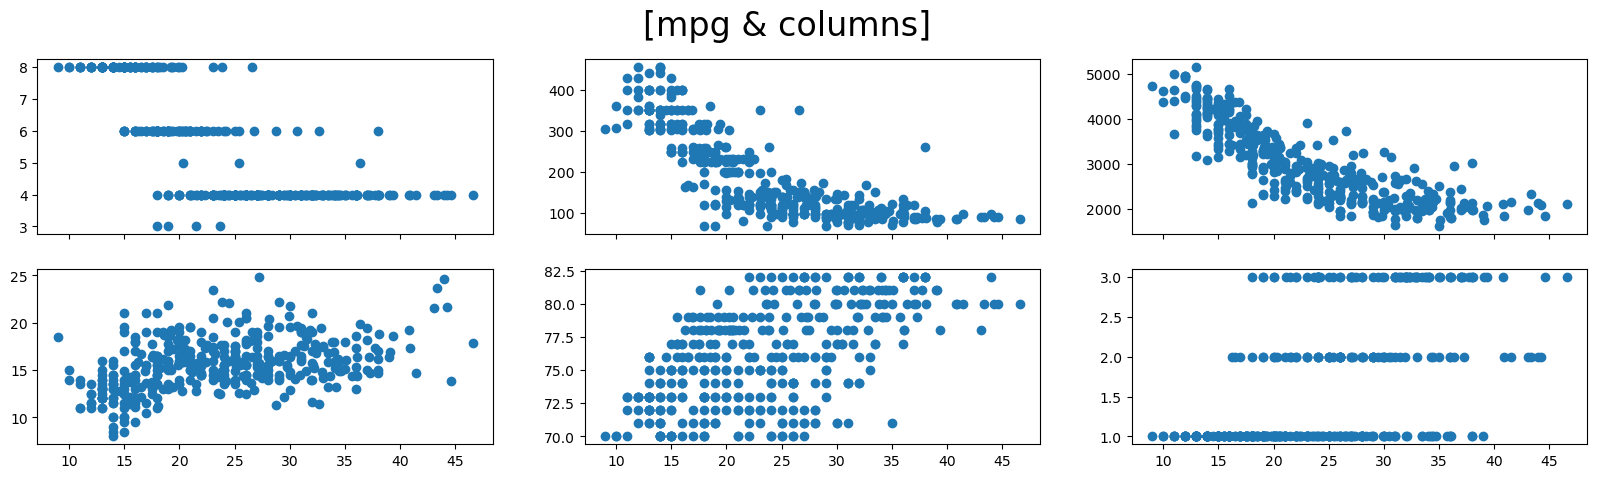

In [103]:
fig = plt.figure(figsize=(20,5))

axs=fig.subplots(2,3, sharex=True)

for row in range(2):
    for col in range(3):
        col_name=corrsr.index[row*3+col+1]
        axs[row, col].scatter(df['mpg'], df[col_name], label=round(corrsr['cylinders'],2))
        

fig.suptitle('[mpg & columns]', fontsize=24)
plt.show()


In [104]:
corrsr.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [105]:
corrsr.index[row*3+col+1]

'origin'